# Percolation Model in 2D

Attribution: **This notebook contains code generated with the assistance of ChatGPT, a language model developed by OpenAI.**

## Python Implementation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class UnionFind:
    def __init__(self, size):
        self.parent = np.arange(size)
        self.rank = np.zeros(size, dtype=int)

    def find(self, x):
        while self.parent[x] != x:
            self.parent[x] = self.parent[self.parent[x]]
            x = self.parent[x]
        return x

    def union(self, x, y):
        rx, ry = self.find(x), self.find(y)
        if rx == ry:
            return
        if self.rank[rx] < self.rank[ry]:
            self.parent[rx] = ry
        elif self.rank[rx] > self.rank[ry]:
            self.parent[ry] = rx
        else:
            self.parent[ry] = rx
            self.rank[rx] += 1

def get_clusters(grid):
    N = grid.shape[0]
    uf = UnionFind(N * N)

    def idx(r, c):
        return r * N + c

    for r in range(N):
        for c in range(N):
            if not grid[r, c]:
                continue
            if r > 0 and grid[r - 1, c]:
                uf.union(idx(r, c), idx(r - 1, c))
            if c > 0 and grid[r, c - 1]:
                uf.union(idx(r, c), idx(r, c - 1))

    root_map = {}
    cluster_id = 0
    clusters = -np.ones_like(grid, dtype=int)

    for r in range(N):
        for c in range(N):
            if grid[r, c]:
                root = uf.find(idx(r, c))
                if root not in root_map:
                    root_map[root] = cluster_id
                    cluster_id += 1
                clusters[r, c] = root_map[root]
    return clusters, cluster_id

def detect_spanning(clusters):
    N = clusters.shape[0]
    cluster_ids = np.unique(clusters[clusters >= 0])
    spanning_map = {}  # cluster_id -> 'spanning' or 'nonspanning'

    for cid in cluster_ids:
        positions = np.argwhere(clusters == cid)
        rows, cols = positions[:, 0], positions[:, 1]
        spans_vert = 0 in rows and (N - 1) in rows
        spans_horiz = 0 in cols and (N - 1) in cols
        if spans_vert or spans_horiz:
            spanning_map[cid] = True
        else:
            spanning_map[cid] = False
    return spanning_map

def colorize_clusters(grid, clusters, spanning_map):
    color_grid = np.zeros_like(clusters, dtype=int)  # 0: empty (black)

    # Map each spanning cluster to a unique color ID starting at 2
    span_id_map = {}
    next_color_id = 2

    for r in range(grid.shape[0]):
        for c in range(grid.shape[1]):
            cid = clusters[r, c]
            if cid == -1:
                continue  # empty cell
            if spanning_map[cid]:
                if cid not in span_id_map:
                    span_id_map[cid] = next_color_id
                    next_color_id += 1
                color_grid[r, c] = span_id_map[cid]
            else:
                color_grid[r, c] = 1  # non-spanning = gray
    return color_grid, next_color_id

def build_colormap(num_colors):
    # 0: empty (black), 1: non-spanning (gray), 2+: spanning clusters
    base_colors = [(0, 0, 0), (0.5, 0.5, 0.5)]  # black, gray
    if num_colors <= 2:
        return mcolors.ListedColormap(base_colors)
    extra_colors = plt.cm.tab10.colors + plt.cm.Set3.colors + plt.cm.Dark2.colors
    extra_colors = extra_colors[:max(0, num_colors - 2)]
    return mcolors.ListedColormap(base_colors + list(extra_colors))

def plot_percolation(color_grid, num_colors):
    plt.figure(figsize=(8, 8))
    cmap = build_colormap(num_colors)
    plt.imshow(color_grid, cmap=cmap, interpolation='none')
    plt.axis('off')
    plt.title("Percolation with Spanning Clusters Highlighted")
    plt.show()

def main(N=100, p=0.59, seed=None):
    if seed is not None:
        np.random.seed(seed)
    grid = np.random.rand(N, N) < p
    clusters, _ = get_clusters(grid)
    spanning_map = detect_spanning(clusters)
    color_grid, num_colors = colorize_clusters(grid, clusters, spanning_map)
    plot_percolation(color_grid, num_colors)


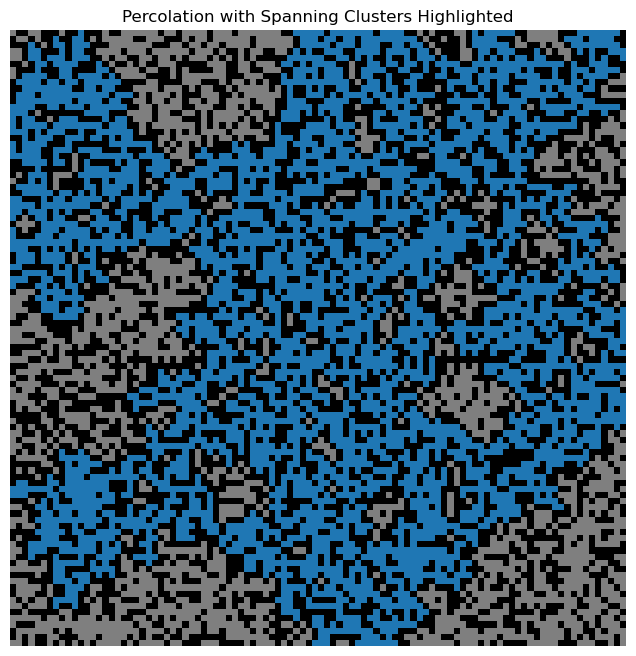

In [31]:
main(N=100, p=0.60)